# Coin flipping experiments

In [31]:
from qiskit import  QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-24 07:36:47,593: Credentials are already in use. The existing account in the session will be replaced.


Helper for executing circuit

In [38]:
def execute_circuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    results = execute(qc, backend, shots=1024).result().get_counts()
    print(results)
    display(plot_histogram(results))

Circuit definition

┌───┐     ┌─┐   
quantum_0: ┤ H ├──■──┤M├───
           └───┘┌─┴─┐└╥┘┌─┐
quantum_1: ─────┤ X ├─╫─┤M├
                └───┘ ║ └╥┘
classic: 2/═══════════╩══╩═
                      0  1

{'00': 508, '11': 516}


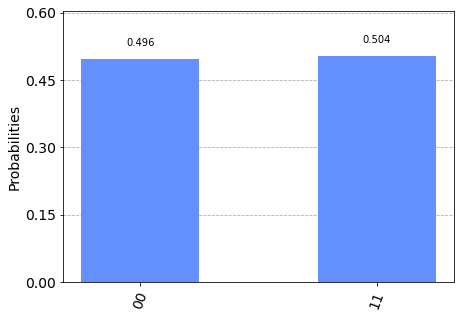

In [39]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.h(0)
qc.cx(0, 1)
qc.measure(quantum_register, classic_register)
display(qc.draw())
execute_circuit(qc)



Other circuit - skip cnot gate

┌───┐┌─┐
quantum_0: ┤ H ├┤M├
           └┬─┬┘└╥┘
quantum_1: ─┤M├──╫─
            └╥┘  ║ 
classic: 2/══╩═══╩═
             1   0

{'00': 511, '01': 513}


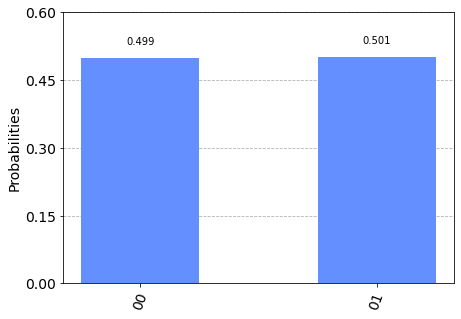

In [41]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.h(0)
qc.measure(quantum_register, classic_register)
display(qc.draw())
execute_circuit(qc)

Other circuit - add not gate

┌───┐     ┌─┐   
quantum_0: ┤ H ├──■──┤M├───
           ├───┤┌─┴─┐└╥┘┌─┐
quantum_1: ┤ X ├┤ X ├─╫─┤M├
           └───┘└───┘ ║ └╥┘
classic: 2/═══════════╩══╩═
                      0  1

{'01': 509, '10': 515}


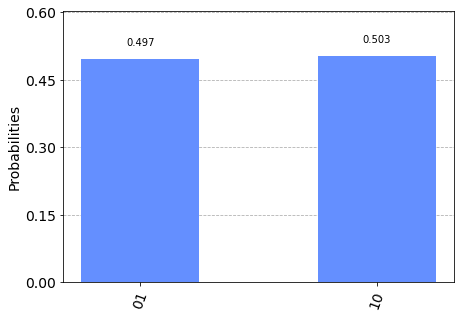

In [44]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure(quantum_register, classic_register)
display(qc.draw())
execute_circuit(qc)

Switch measurement

┌───┐     ┌─┐   
quantum_0: ┤ H ├──■──┤M├───
           └───┘┌─┴─┐└╥┘┌─┐
quantum_1: ─────┤ X ├─╫─┤M├
                └───┘ ║ └╥┘
classic: 2/═══════════╩══╩═
                      1  0

{'00': 533, '11': 491}


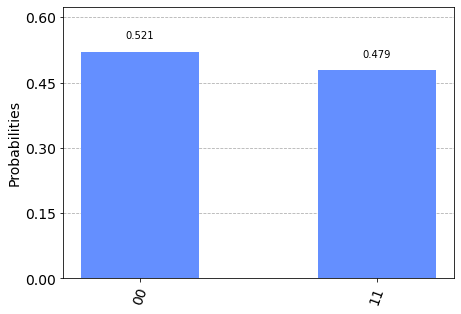

In [42]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.h(0)
qc.cx(0, 1)
qc.measure(quantum_register[0], classic_register[1])
qc.measure(quantum_register[1], classic_register[0])
display(qc.draw())
execute_circuit(qc)

Other circuit - second Hadamard

┌───┐     ┌─┐   
quantum_0: ┤ H ├──■──┤M├───
           ├───┤┌─┴─┐└╥┘┌─┐
quantum_1: ┤ H ├┤ X ├─╫─┤M├
           └───┘└───┘ ║ └╥┘
classic: 2/═══════════╩══╩═
                      1  0

{'00': 281, '01': 259, '10': 234, '11': 250}


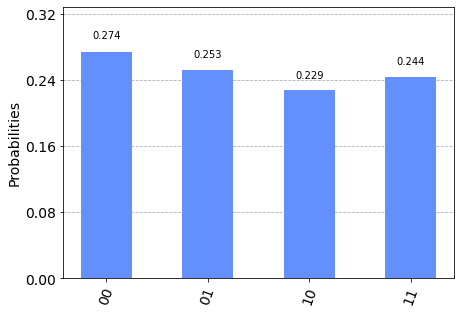

In [45]:
quantum_register = QuantumRegister(2, "quantum")
classic_register = ClassicalRegister(2, "classic")
qc = QuantumCircuit(quantum_register, classic_register)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.measure(quantum_register[0], classic_register[1])
qc.measure(quantum_register[1], classic_register[0])
display(qc.draw())
execute_circuit(qc)